In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('data/comic 1.txt')

In [21]:
x  = df['x']
y  = df['y']

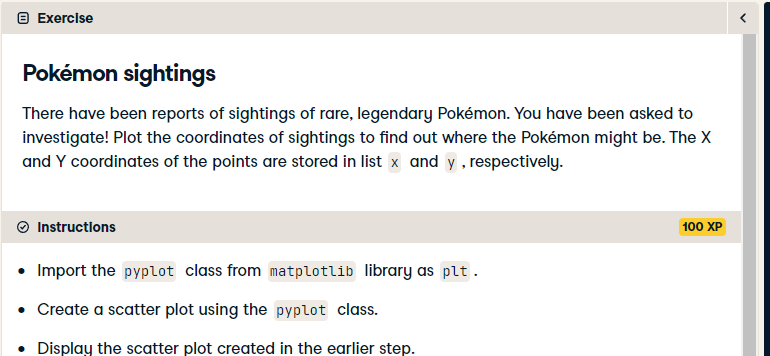

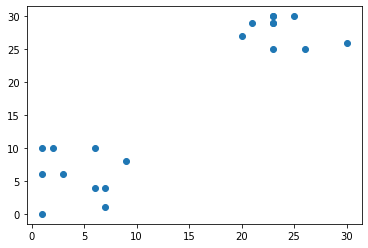

In [22]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt
 
# Create a scatter plot
plt.scatter(x, y)
 
# Display the scatter plot
plt.show()

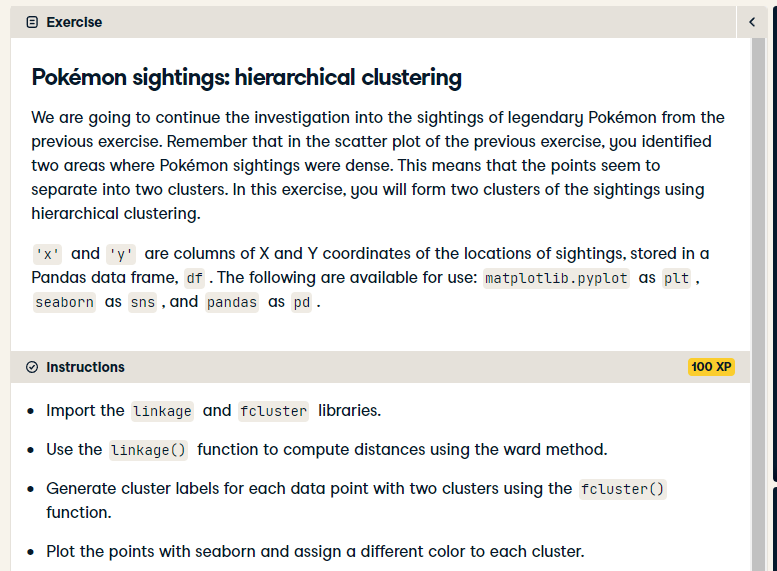

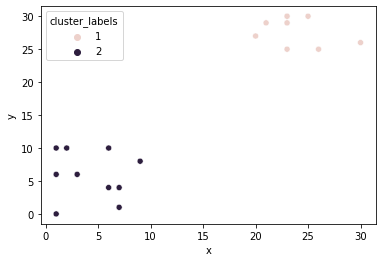

In [23]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster
 
# Use the linkage() function to compute distance
Z = linkage(df, 'ward')
 
# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')
 
# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

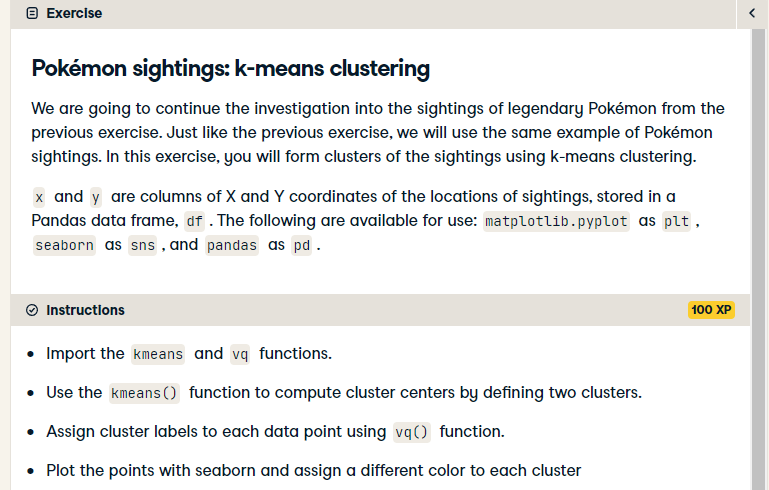

In [30]:
df = df[['x','y','cluster_labels']]

In [36]:
df = df.astype(float)

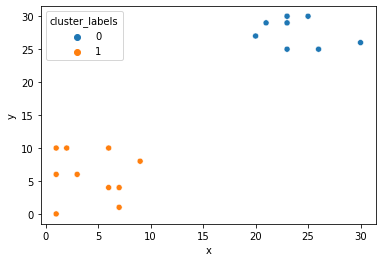

In [37]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq
 
# Compute cluster centers
centroids,_ = kmeans(df, 2)
 
# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)
 
# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

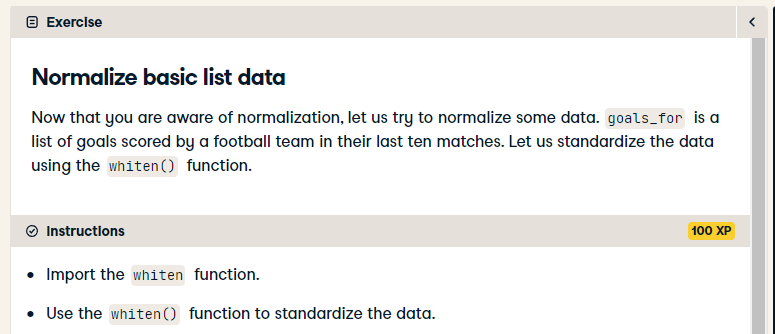

In [39]:
# Import the whiten function
from scipy.cluster.vq import whiten
 
goals_for = [4,3,2,3,1,1,2,0,1,4]
 
# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


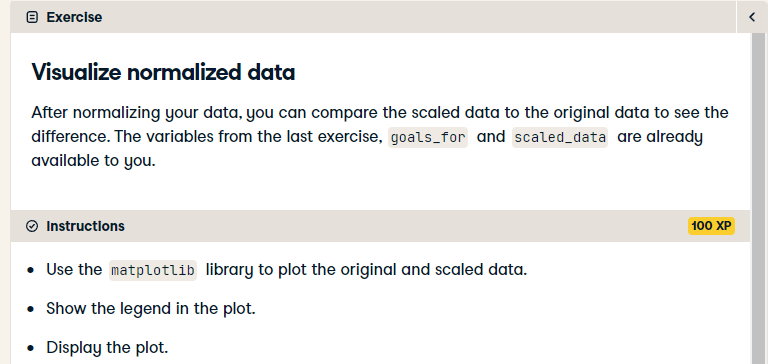

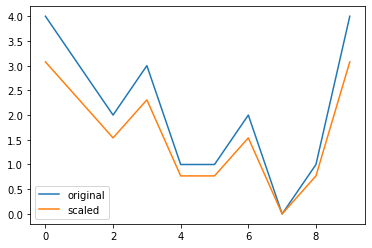

In [40]:
# Plot original data
plt.plot(goals_for, label='original')
 
# Plot scaled data
plt.plot(scaled_data, label='scaled')
 
# Show the legend in the plot
plt.legend()
 
# Display the plot
plt.show()

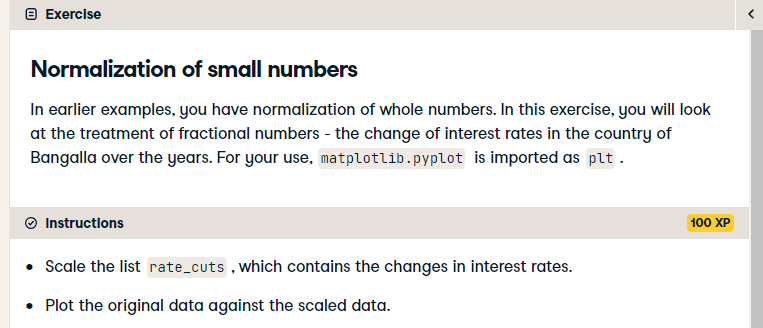

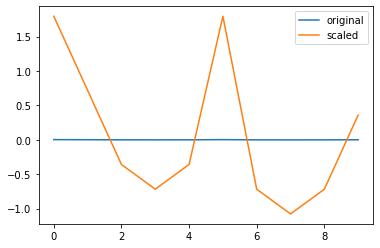

In [42]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]
 
# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)
 
# Plot original data
plt.plot(rate_cuts, label='original')
 
# Plot scaled data
plt.plot(scaled_data, label='scaled')
 
plt.legend()
plt.show()

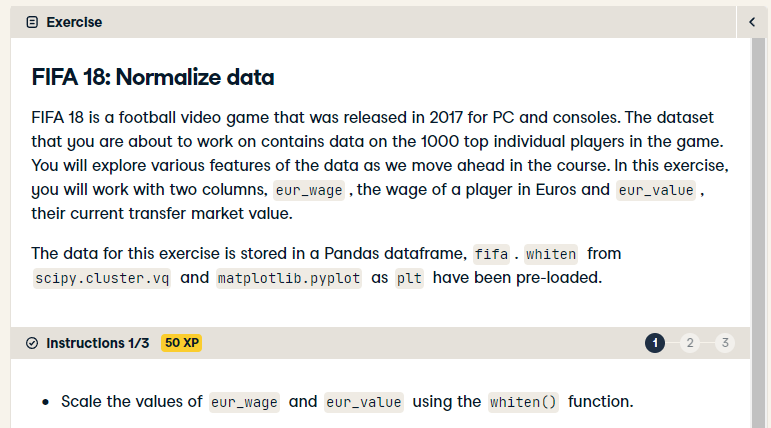
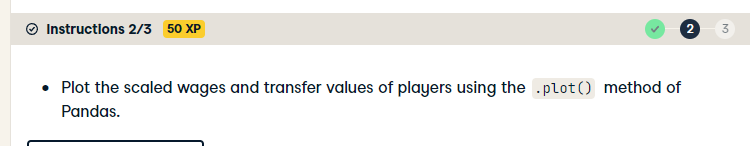
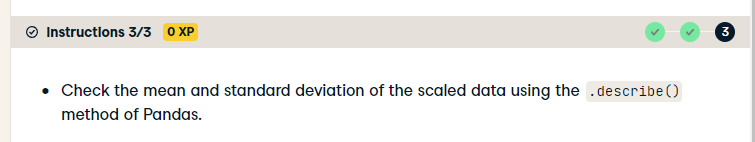

In [44]:
fifa = pd.read_csv('data/fifa1.txt')
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 186 entries, Unnamed: 0 to prefers_gk
dtypes: bool(92), float64(32), int64(49), object(13)
memory usage: 824.3+ KB


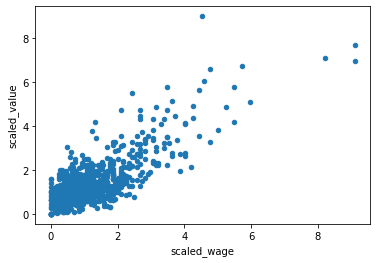

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [45]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])
 
# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()
 
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

## 2 Hierarchical Clustering


In [46]:
comic_con = pd.read_csv('./data/comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [47]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

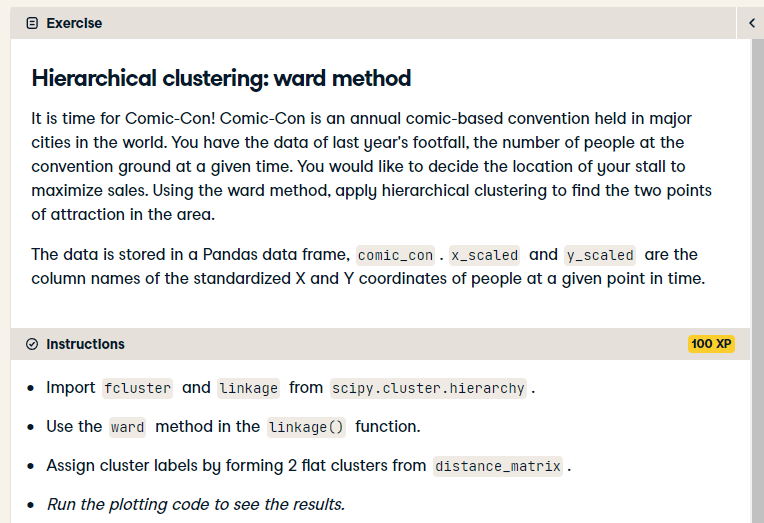

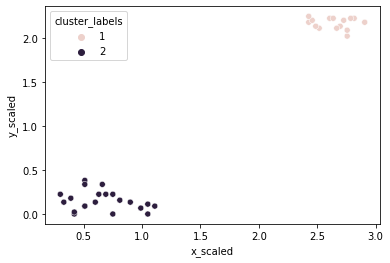

In [52]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);
plt.show()

### Hierarchical clustering: single method
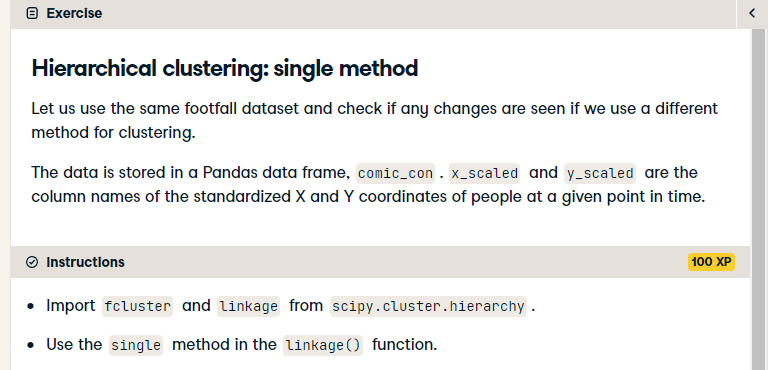

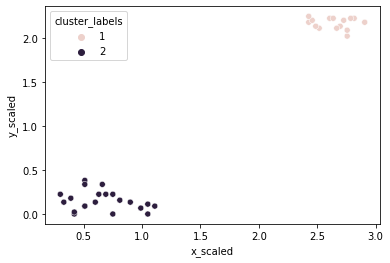

In [53]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);
plt.show()

### Hierarchical clustering: complete method
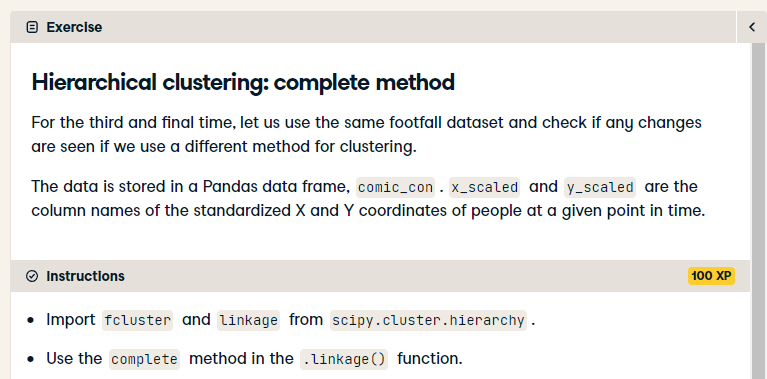



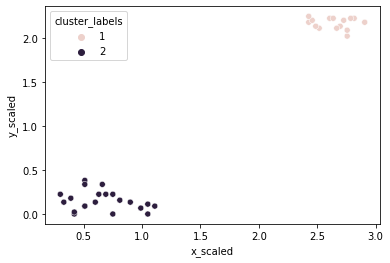

In [54]:

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);
plt.show()

## Visualize clusters
- Why visualize clusters?
    - Try to make sense of the clusters formed
    - An additional step in validation of clusters
    - Spot trends in data

### Visualize clusters with matplotlib
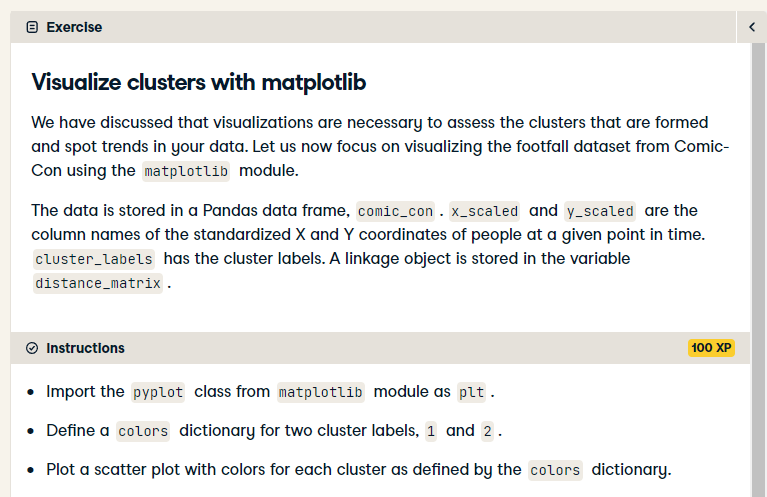

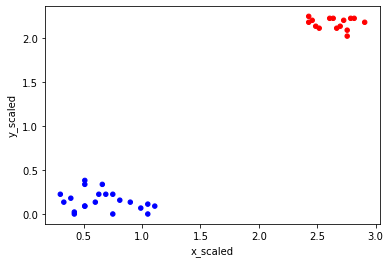

In [55]:
# Import the pyplot class
import matplotlib.pyplot as plt


# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]));
plt.show()

### Visualize clusters with seaborn
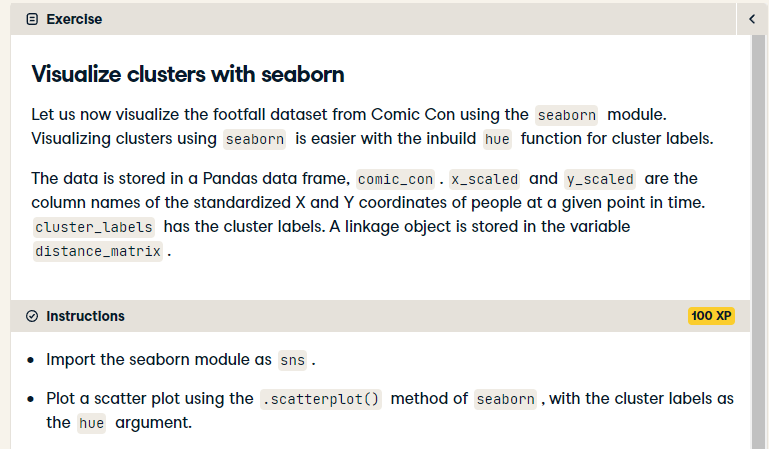

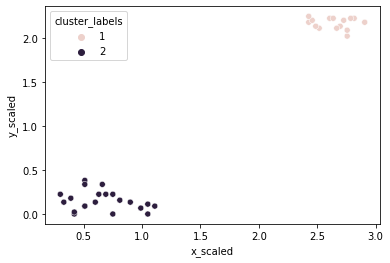

In [56]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)
plt.show()

## How many clusters?
- Introduction to dendrograms
    - Strategy till now - decide clusters on visual inspection
    - Dendrograms help in showing progressions as clusters are merged
    - A dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

### Create a dendrogram
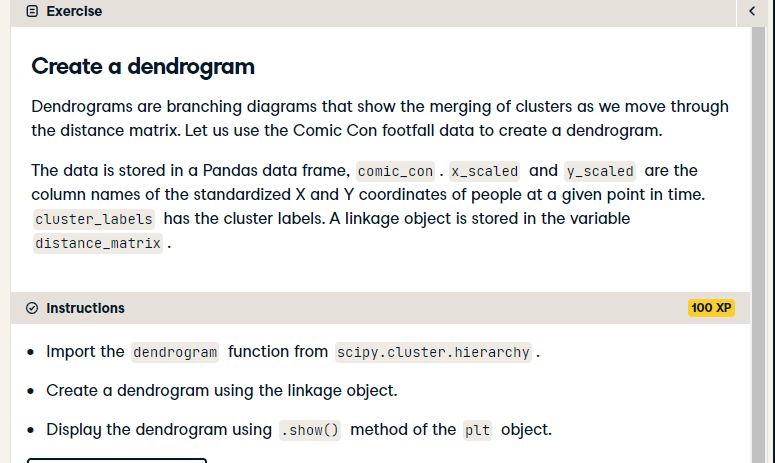


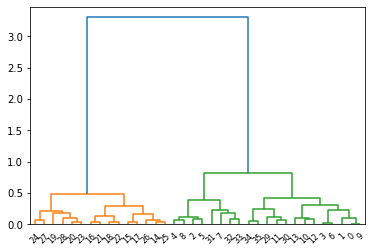

In [57]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

### Limitations of hierarchical clustering
- Comparison of runtime of linkage method
    - Increasing runtime with data points
    - Quadratic increase of runtime
    - Not feasible for large datasets

### Timing run of hierarchical clustering
In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system.

Remember that you can time the execution of small code snippets with:
```python
%timeit sum([1, 3, 2])
```

In [ ]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

459 µs ± 377 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### FIFA 18: exploring defenders
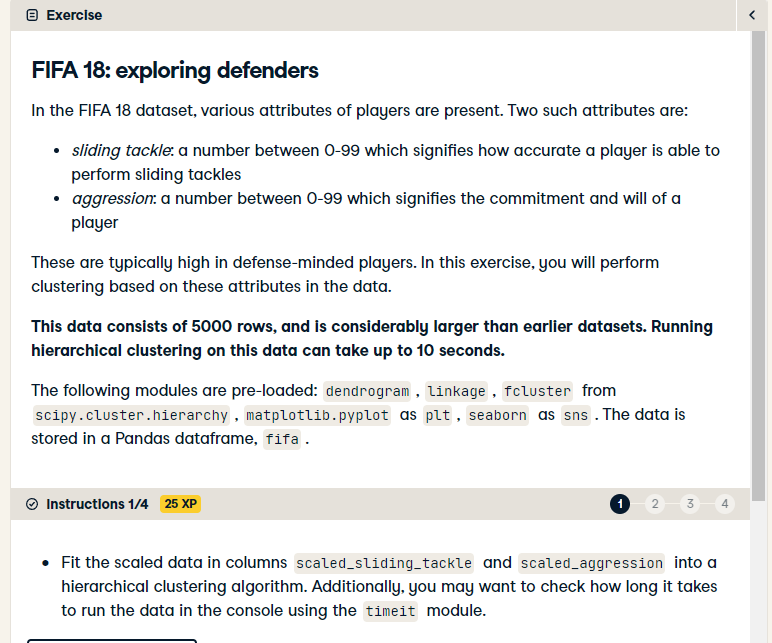
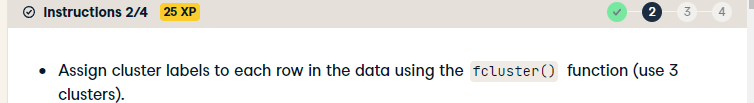
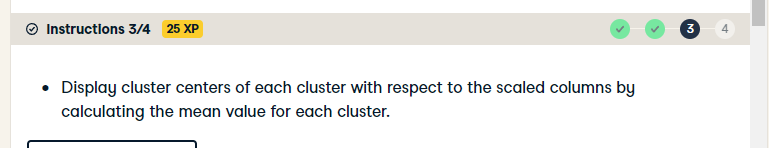
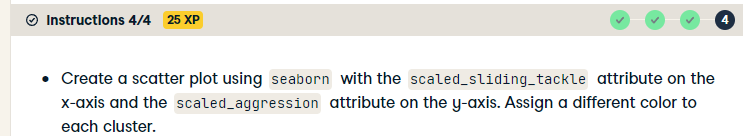

In [59]:
fifa = pd.read_csv('./data/fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [60]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


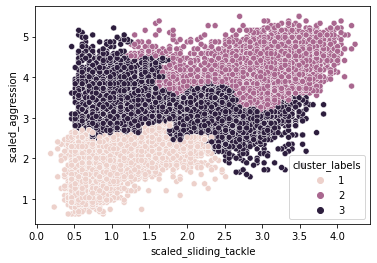

In [63]:
# Fit the data into a hierarchical cluster
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

### 3 K-Means Clustering

### K-means clustering: first exercise
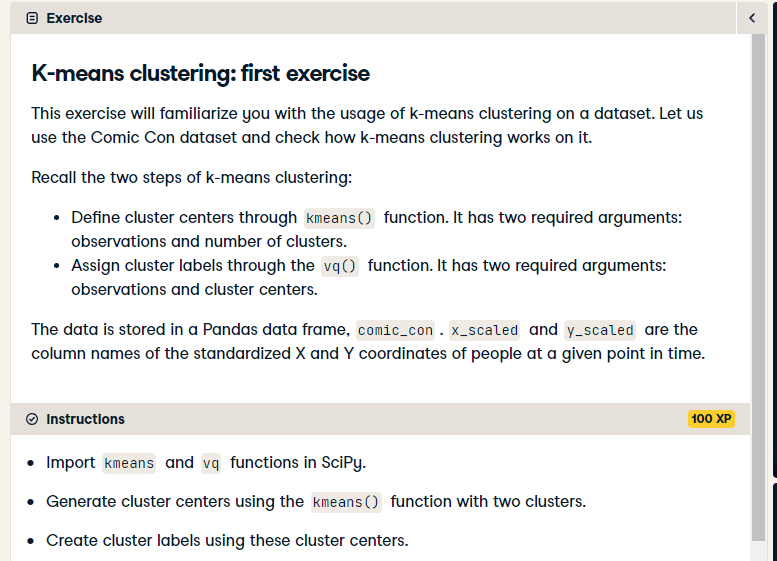

In [64]:
comic_con = pd.read_csv('./data/comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [65]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

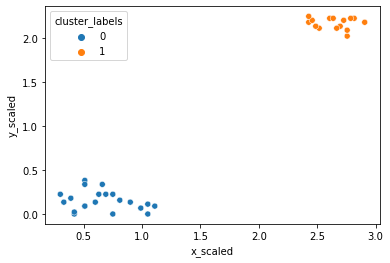

In [66]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortions = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);
plt.show()

### Runtime of k-means clustering
Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the kmeans() function on the FIFA dataset?

- Preprocess

In [5]:
fifa = pd.read_csv('./dataset/fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [6]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [67]:
from scipy.cluster.hierarchy import linkage

%timeit linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

11 s ± 462 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

94.2 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## How many clusters?
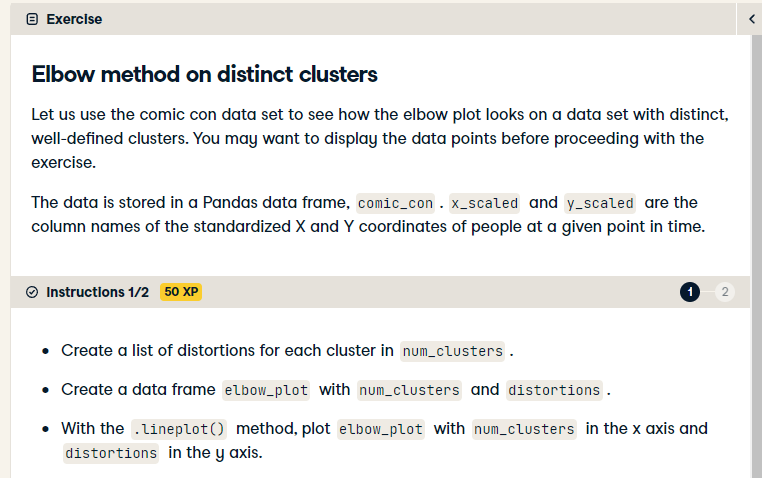


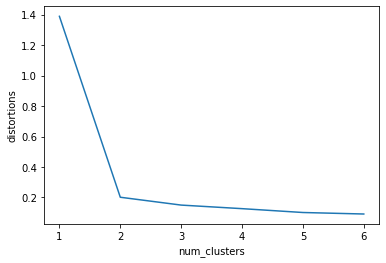

In [69]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot);
plt.xticks(num_clusters);
plt.show()

### Elbow method on uniform data
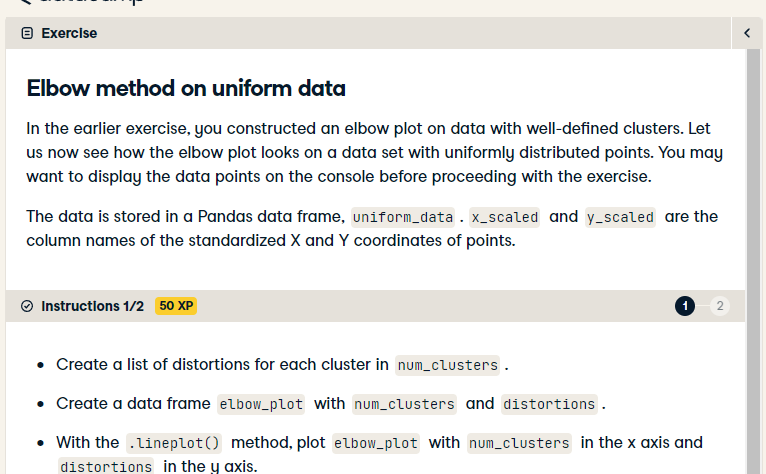

In [70]:
uniform_data = pd.read_csv('./data/uniform_data.csv', index_col=0)
uniform_data.head()

,x_coordinate,y_coordinate
0,39,3
1,42,7
2,58,3
3,43,3
4,13,6


In [71]:
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

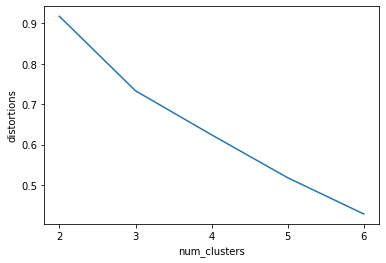

In [72]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot);
plt.xticks(num_clusters);
plt.show()

## Limitations of k-means clustering
- Limitations of k-means clustering
    - How to find the right K
    - Impact of seeds
    - Biased towards equal sized clusters

### Impact of seeds on distinct clusters
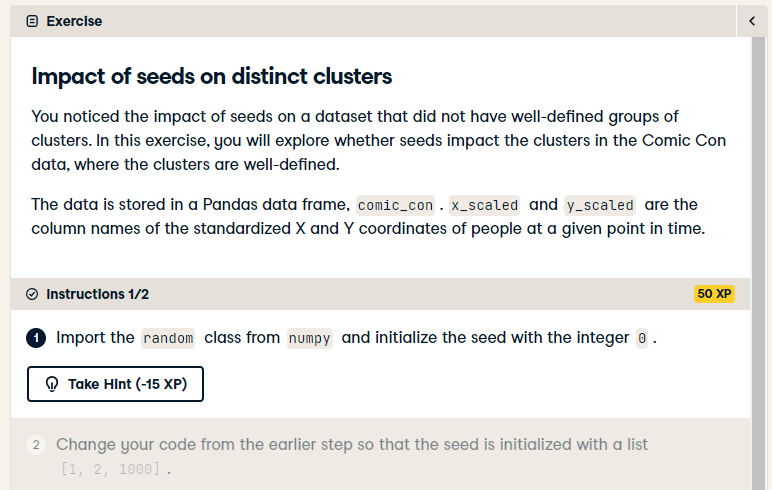



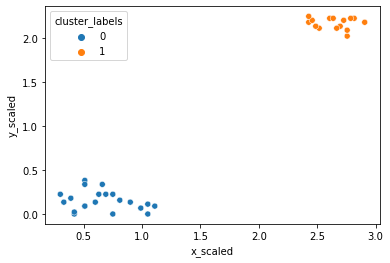

In [74]:
# Import random class
from numpy import random
# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);
plt.show()

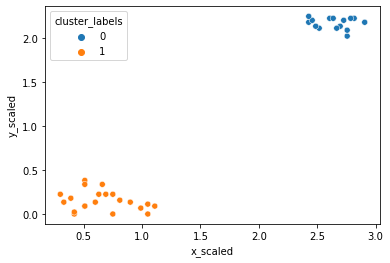

In [75]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Uniform clustering patterns
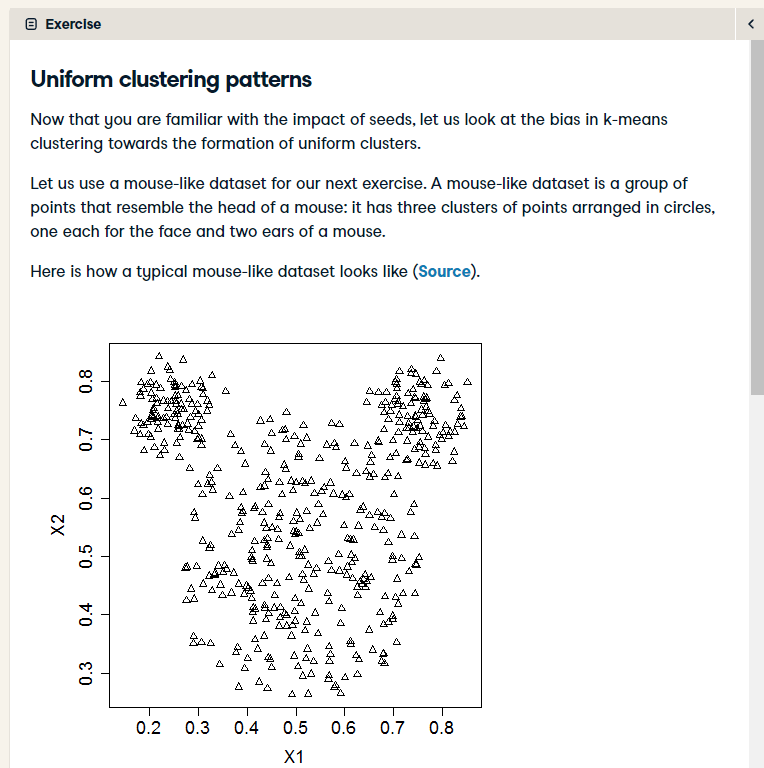
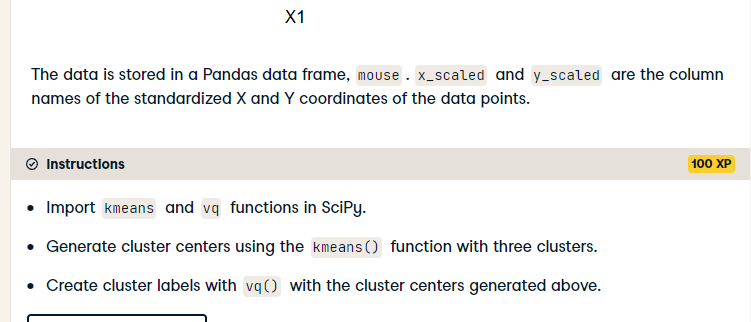

- preprocess

In [76]:
mouse = pd.read_csv('./data/mouse.csv', index_col=0)
mouse.head()

,x_coordinate,y_coordinate
0,33.875528,44.893421
1,38.208748,41.116327
2,35.740588,57.418006
3,32.546963,57.218082
4,62.063146,47.196944


In [77]:
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

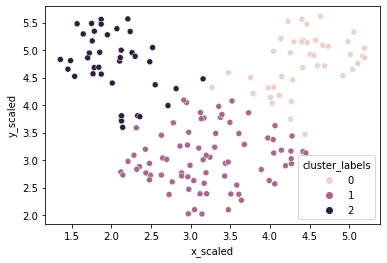

In [78]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=mouse);

### FIFA 18: defenders revisited
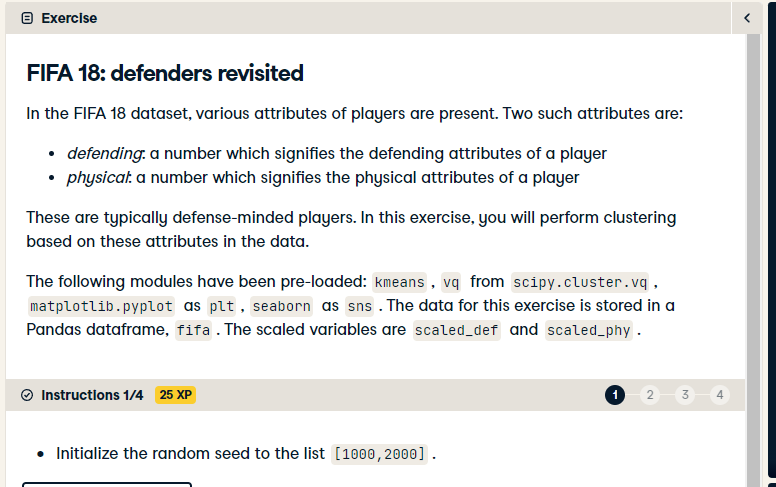

In [79]:
fifa = pd.read_csv('./data/fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [80]:
fifa = fifa[['def', 'phy']].copy()

In [81]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


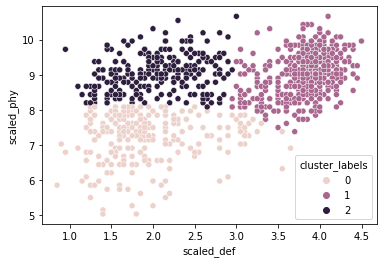

In [82]:
# Setup a random seed in numpy
random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers, _ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa);
plt.show()

### 4 Clustering in Real World


## Dominant colors in images
- Dominant colors in images
    - All images consist of pixels
    - Each pixel has three values: R, G, B
    - Pixel Color: combination of these RGB values
    - Perform k-means on standardized RGB values to find cluster centers
    - Uses: Identifying features in statelite images

### Extract RGB values from image
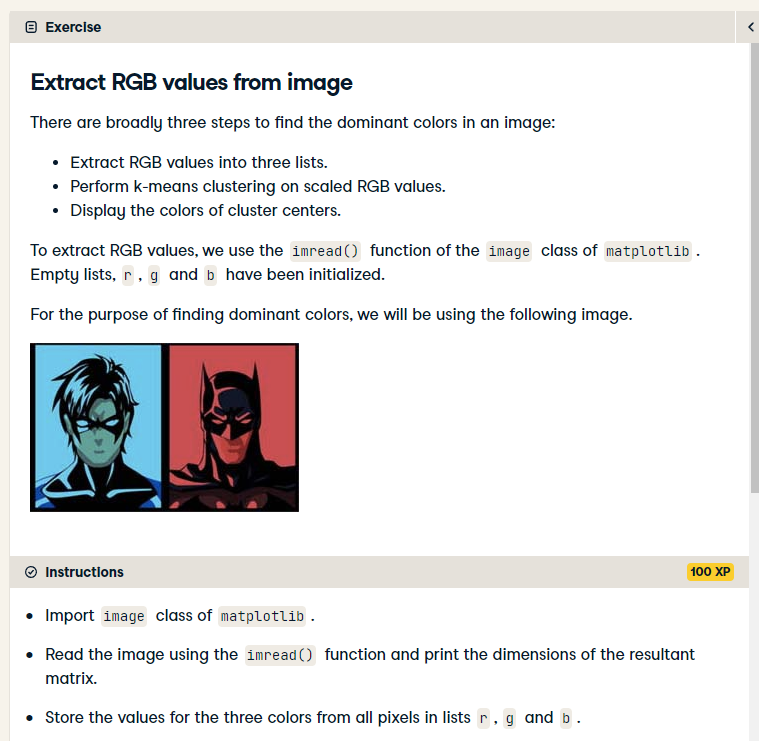

In [83]:
import matplotlib.image as img

r = []
g = []
b = []

# Read batman image and print dimensions
batman_image = img.imread('./data/batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g, and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row: 
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


### How many dominant colors?
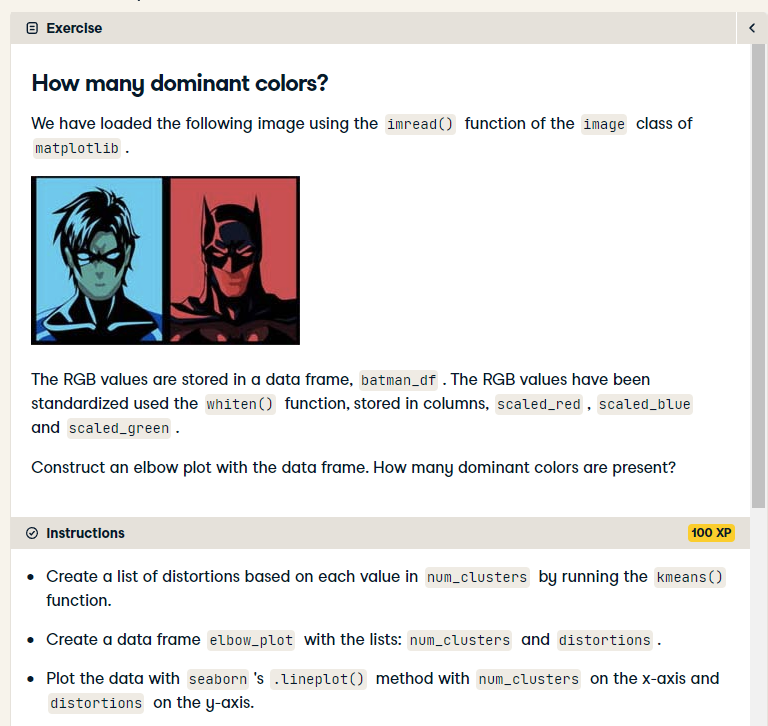

In [84]:
from scipy.cluster.vq import whiten

batman_df = pd.DataFrame({'red':r, 'blue':b, 'green':g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

In [85]:
from scipy.cluster.vq import kmeans

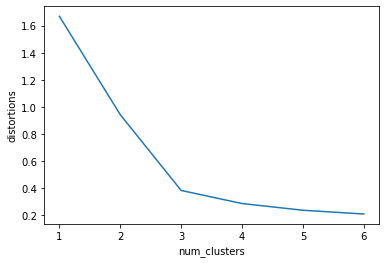

In [86]:


distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot);
plt.xticks(num_clusters);
plt.show()

### Display dominant colors
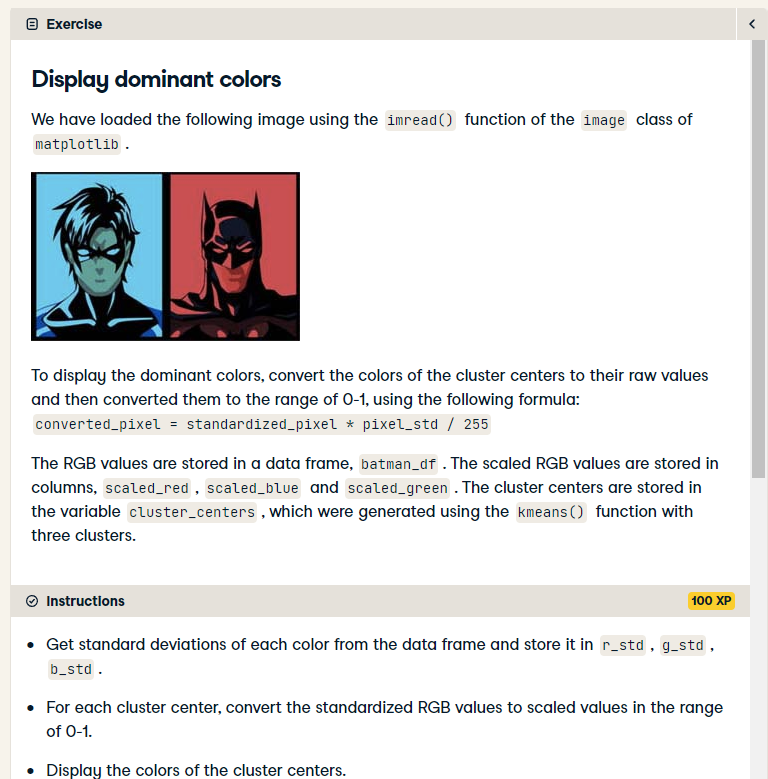

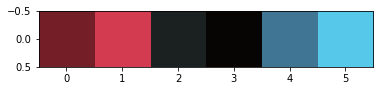

In [87]:
colors = []

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255.0,
        scaled_g * g_std / 255.0,
        scaled_b * b_std / 255.0
        )
    )
    
# Display colors of cluster centers
plt.imshow([colors])

## Document clustering
- Document clustering: concepts
    - 1. Clean data before processing
    - 2. Determine the importance of the terms in a document (in tf-idf matrix)
    - 3. Cluster the tf-idf matrix
    - 4. Find top terms, documents in each cluster
- TF-IDF (Term Frequency - Inverse Document Frequency)
    - A weighted measure: evaluate how important a word is to a document in a collection
- Top terms per cluster
    - Cluster centers: lists with a size equal to the number of terms
    - Each value in the cluster center is its importance
- More considerations
    - Work with hyperlinks, emoticons etc.
    - Normalize words (e.g. run, ran, running -> run)
    - ```.todense()``` may not work with large datasets

### TF-IDF of movie plots
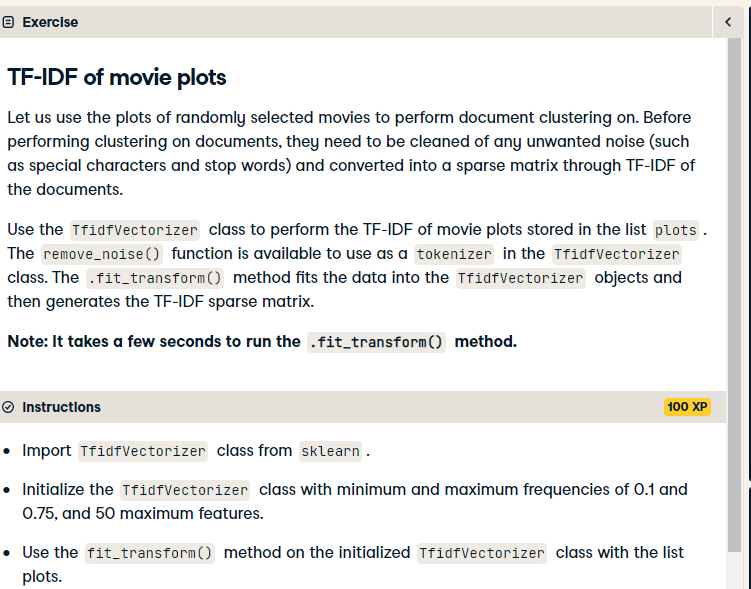

In [90]:
movie = pd.read_csv('./data/movies_plot.csv')
plots = movie['Plot'].values

In [91]:
from nltk.tokenize import word_tokenize
import re

import nltk
nltk.download('punkt')

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asd_v\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

### Top terms in movie clusters
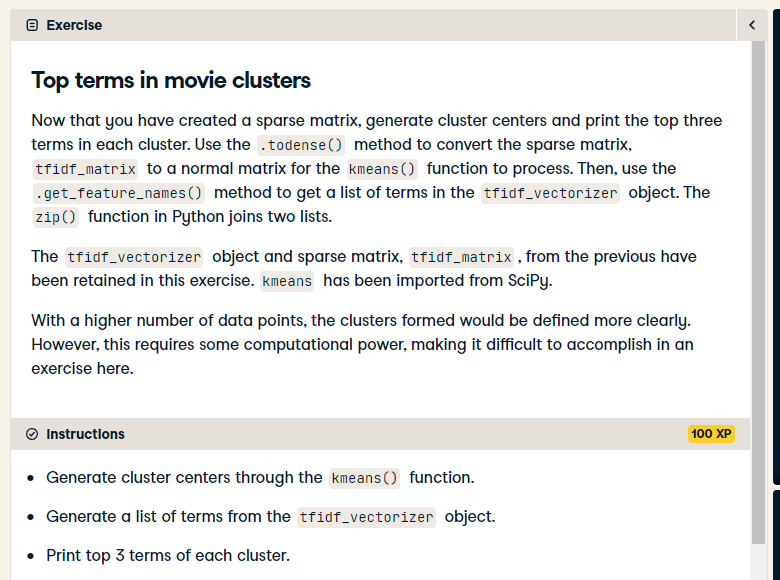


In [10]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['her', 'she', 'him']
['him', 'they', 'who']


## Clustering with multiple features


### Basic checks on clusters
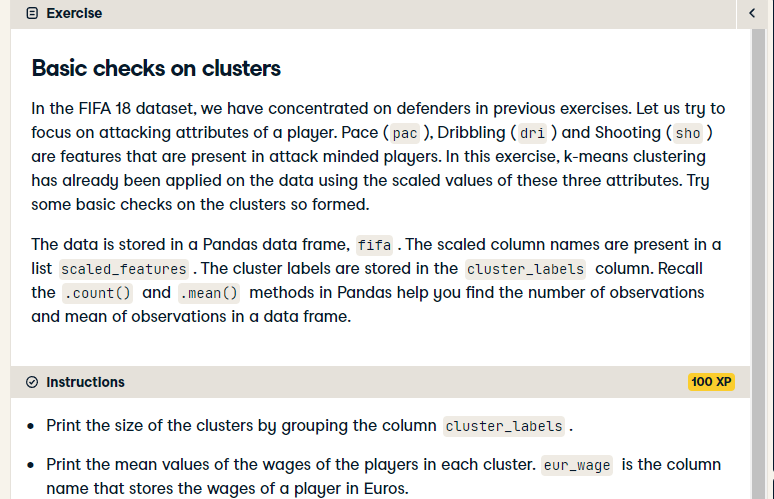



In [93]:
fifa = pd.read_csv('./data/fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [94]:
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

In [95]:
from scipy.cluster.vq import vq

cluster_centers, _ = kmeans(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)

fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)

In [14]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    182
1    457
2    361
Name: ID, dtype: int64
cluster_labels
0    63225.274725
1    77297.592998
2    62603.878116
Name: eur_wage, dtype: float64


### FIFA 18: what makes a complete player?
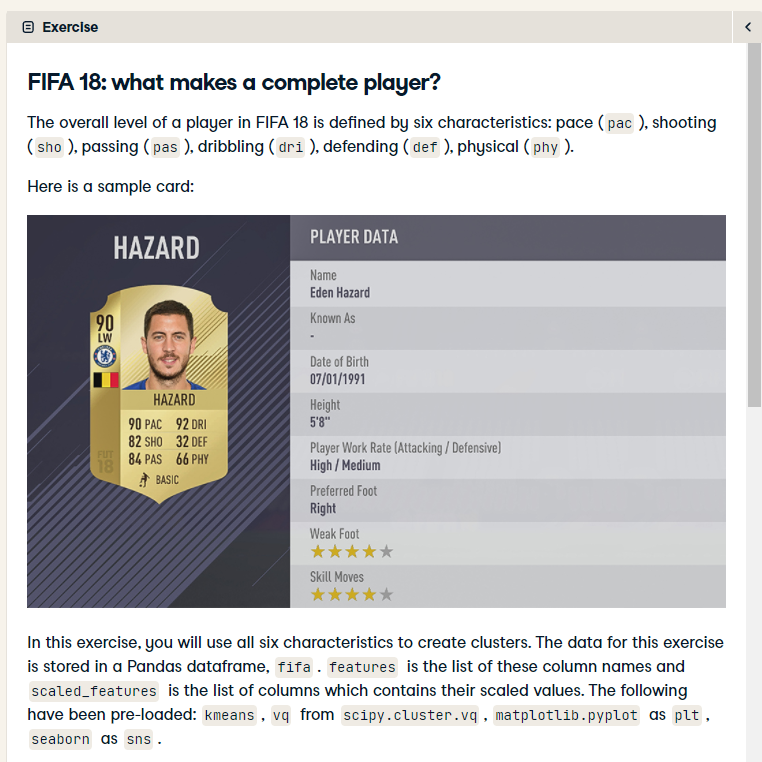
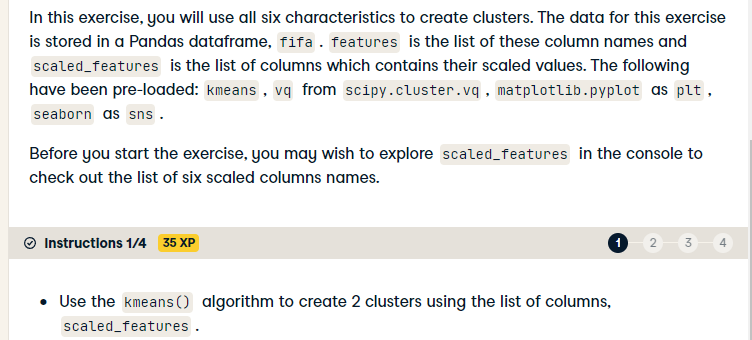

In [96]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [97]:
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pac', 'scaled_dri', 'scaled_def', 'scaled_phy']

                scaled_pac  scaled_sho  scaled_pac  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.472701    3.983154    5.472701    7.039844    3.859591   
1                 6.823862    5.467795    6.823862    8.574124    2.382079   

                scaled_phy  
cluster_labels              
0                 9.117722  
1                 8.279279  
1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['T. Kroos' 'Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng']


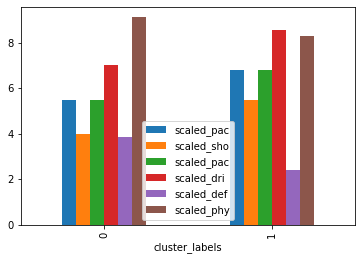

In [99]:
# Create centroids with kmeans for 2 clusters
cluster_centers, _ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])
